Being one of Ross Tran's biggest fans, I decided to use his art style in this style transfer gan to style up Angelina Jolie's image. Do follow Ross Tran and all appreciation to his art

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [20]:
gan = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [50]:
def image_loader(path):
    
    img = tf.keras.utils.load_img(
    path, target_size=(256, 256)
)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array/255.0

In [51]:
content_image = image_loader("angelina_jolie.jpeg")
style_image = image_loader("ross-tran.png")

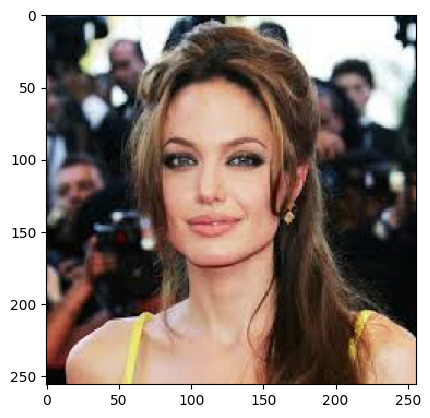

In [54]:
plt.imshow(np.squeeze(content_image))

In [56]:
outputs = gan(tf.constant(content_image), tf.constant(style_image))

In [57]:
stylized_image = outputs[0]

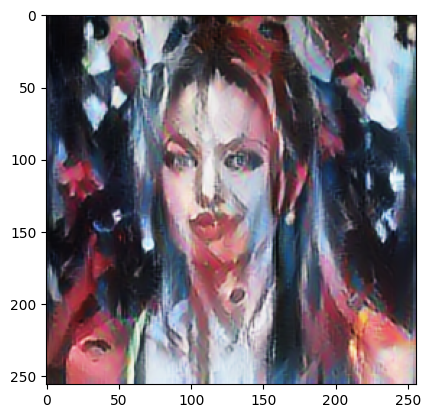

In [59]:
plt.imshow(np.squeeze(stylized_image))

In [60]:
gan.save("style_gan.h5")

AttributeError: '_UserObject' object has no attribute 'save'

In [62]:
tf.saved_model.save(gan, "style_gan")

INFO:tensorflow:Assets written to: style_gan\assets


INFO:tensorflow:Assets written to: style_gan\assets


In [64]:
import keras
style = keras.models.load_model("style_gan")

In [65]:
outputs = style(tf.constant(content_image), tf.constant(style_image))

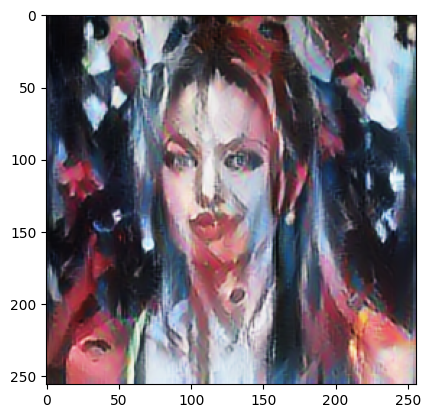

In [67]:
plt.imshow(np.squeeze(outputs[0]))